In [2]:
from sklearn.cluster import KMeans
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from matplotlib import pyplot as plt
%matplotlib inline

##### **Load the dataset**

In [3]:
# 1. Load CSV files 

file_path = "2013_NO2.csv"
df_NO2 = pd.read_csv(file_path)

file_path = "2013_NOx.csv"
df_NOx = pd.read_csv(file_path)

file_path = "2013_PM10.csv"
df_PM10 = pd.read_csv(file_path)

file_path = "2013_PM25.csv"
df_PM25 = pd.read_csv(file_path)

In [4]:
df_NOx.head()

,x,y,conct,year
0,501460,170580,49.21837,2013
1,501460,170600,49.78666,2013
2,501460,170620,50.36728,2013
3,501460,170640,50.94635,2013
4,501460,170660,51.51179,2013


**Note that x, y variables values do not represent longitude and latitude directly.**

Based on the information from the London Atmospheric Emissions Inventory, it appears that the x and y values are *projected coordinates* of a point in the British National **Grid reference system**.

The Emissions Inventory provides detailed data on air pollution in London, and includes information on the location and intensity of emissions from various sources. To geolocate these emissions, the Inventory uses a geographic information system (GIS) that uses the British National Grid reference system to represent locations in London. The x and y values provided in the Inventory are the easting and northing coordinates of each emission source, respectively, as measured in meters from the origin of the British National Grid reference system.

To convert these coordinates to latitude and longitude, you would need to use a coordinate transformation that converts from the British National Grid reference system to the WGS84 coordinate system, which is the standard coordinate system used by GPS and other mapping systems. There are many tools and libraries available for doing this transformation, such as the pyproj library in Python.

In [5]:
df_NO2.head()

,x,y,conct,year
0,501460,170580,31.31919,2013
1,501460,170600,31.55455,2013
2,501460,170620,31.79392,2013
3,501460,170640,32.03141,2013
4,501460,170660,32.26324,2013


In [6]:
df_PM10.head()

,x,y,conct,year
0,501460,170580,23.74403,2013
1,501460,170600,23.78645,2013
2,501460,170620,23.82961,2013
3,501460,170640,23.87249,2013
4,501460,170660,23.91457,2013


In [7]:
df_PM25.head()

,x,y,conct,year
0,501460,170580,14.90253,2013
1,501460,170600,14.91900,2013
2,501460,170620,14.93577,2013
3,501460,170640,14.95249,2013
4,501460,170660,14.96894,2013


In [8]:
# Rename 'conct' column in each data frame to the respective pollutant name 
df_NOx.rename(columns={'conct':'NOx'}, inplace=True)
df_NO2.rename(columns={'conct':'NO2'}, inplace=True)
df_PM10.rename(columns={'conct':'PM10'}, inplace=True)
df_PM25.rename(columns={'conct':'PM25'}, inplace=True)

In [9]:
# Drop the 'year' column in each data frame
df_NOx.drop(columns=['year'], inplace=True)
df_NO2.drop(columns=['year'], inplace=True)
df_PM10.drop(columns=['year'], inplace=True)
df_PM25.drop(columns=['year'], inplace=True)

In [10]:
# verify the changes
df_NOx.head(1)

,x,y,NOx
0,501460,170580,49.21837


In [11]:
# verify the changes
df_NO2.head(1)

,x,y,NO2
0,501460,170580,31.31919


In [12]:
# verify the changes
df_PM10.head(1)

,x,y,PM10
0,501460,170580,23.74403


In [13]:
# verify the changes
df_PM25.head(1)

,x,y,PM25
0,501460,170580,14.90253


**Checking each dataframe for:**
 - duplicate values
 - missing values

In [14]:
# Check the number of duplicated rows
df_NOx.duplicated().sum()

0

In [15]:
# Check the number of duplicated rows
df_NO2.duplicated().sum()

0

In [16]:
# Check the number of duplicated rows
df_PM10.duplicated().sum()

0

In [17]:
# Check the number of duplicated rows
df_PM25.duplicated().sum()

0

In [18]:
# Check the number of missing values
df_NOx.isnull().sum()

x      0
y      0
NOx    0
dtype: int64

In [19]:
# Check the number of missing values
df_NO2.isnull().sum()

x      0
y      0
NO2    0
dtype: int64

In [20]:
# Check the number of missing values
df_PM10.isnull().sum()

x       0
y       0
PM10    0
dtype: int64

In [21]:
# Check the number of missing values
df_PM25.isnull().sum()

x       0
y       0
PM25    0
dtype: int64

In [22]:
# merge together NOx and NO2 (outer join)
df_NOx_NO2 = df_NOx.merge(df_NO2, how='outer', on=['x', 'y'], suffixes=('_NOx', '_NO2'))

In [23]:
# merge together PM10 and PM25 (outer join)
df_PM10_PM25 = df_PM10.merge(df_PM25, how='outer', on=['x', 'y'], suffixes=('_PM10', '_PM25'))

In [24]:
# merge together all data frames: df_NOx_NO2  and  df_PM10_PM25 (outer join)
df = df_NOx_NO2.merge(df_PM10_PM25, how='outer', on=['x', 'y'])

In [25]:
# verify if merge was successful
df.tail()

,x,y,NOx,NO2,PM10,PM25
5856423,561980,185040,23.47701,19.17837,21.63205,14.03577
5856424,561980,185060,23.46760,19.17087,21.63140,14.03523
5856425,561980,185080,23.46071,19.16383,21.63077,14.03471
5856426,561980,185100,23.45906,19.15805,21.63017,14.03422
5856427,561980,185120,23.48103,19.15766,21.62972,14.03389


In [26]:
# verify the number of NaN values as a result of outer join of 4 data frames
df.isnull().sum()

x       0
y       0
NOx     0
NO2     0
PM10    0
PM25    0
dtype: int64

### **Save clean data **

In [31]:
df.to_csv('air_pollutants.csv', index=False)


# Open clean air_pollutants.csv

In [32]:
from sklearn.cluster import KMeans
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

from matplotlib import pyplot as plt
%matplotlib inline


In [3]:
# 1. Load CSV files from Google Drive for key polutants

file_path = "air_pollutants.csv"
df = pd.read_csv(file_path)

In [4]:
# check the descriptive statistics 
df.describe()

,x,y,NOx,NO2,PM10,PM25
count,5.856428e+06,5.856428e+06,5.856428e+06,5.856428e+06,5.856428e+06,5.856428e+06
mean,5.292992e+05,1.785424e+05,4.784915e+01,3.070690e+01,2.396516e+01,1.527605e+01
std,1.481801e+04,1.291426e+04,2.483966e+01,8.940069e+00,1.829711e+00,8.771697e-01
min,5.014600e+05,1.523400e+05,2.334954e+01,1.909822e+01,2.162767e+01,1.403142e+01
25%,5.168200e+05,1.679000e+05,3.416127e+01,2.497873e+01,2.280733e+01,1.465707e+01
50%,5.292400e+05,1.789400e+05,4.250738e+01,2.888253e+01,2.358067e+01,1.509888e+01
75%,5.416600e+05,1.893800e+05,5.304817e+01,3.363725e+01,2.455804e+01,1.564445e+01
max,5.619800e+05,2.034400e+05,9.237618e+03,6.430457e+02,1.193994e+02,1.108271e+02


In [5]:
# check the data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856428 entries, 0 to 5856427
Data columns (total 6 columns):
 #   Column  Dtype  
---  ------  -----  
 0   x       int64  
 1   y       int64  
 2   NOx     float64
 3   NO2     float64
 4   PM10    float64
 5   PM25    float64
dtypes: float64(4), int64(2)
memory usage: 268.1 MB


**Handling correlated features**

 The NO2 and NOx columns most likely are correlated, becasue NOx is a term used to describe the family of nitrogen oxides, which includes both NO and NO2.
 NO2 is a subset of NOx and is formed when NO reacts with oxygen in the atmosphere.
 


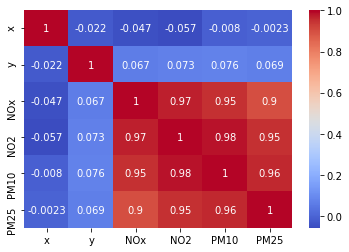

In [6]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Create a heatmap using Seaborn
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Show the plot
plt.show()

It appears that there is a high correlation value of 0.9 and above  between NOx, NO2, PM10, and PM25 indicating a strong positive linear relationship between these variables.

This multicollinearity makes sense in the context of air pollution data, as all pollutants are related to sources of air pollution, such as transportation emissions.

"The high correlation of air pollutants results in collinearity, making it difficult to determine the independent effect of a single pollutant. "
source: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6612149/


**Note:** multicollinearity can pose problems in some modeling techniques, such as linear regression, where it can lead to unstable estimates of the model coefficients and make it difficult to interpret the results. 

Source: https://towardsdatascience.com/multi-collinearity-in-regression-fe7a2c1467ea

Also K-means can be affected, 
K-means clustering algorithm with highly correlated variables highly correlated variables can cause K-means to assign more weight to certain variables and ignore others, which can lead to suboptimal clustering results. However, there many posts stating that it is okay to use it:
https://stats.stackexchange.com/questions/62253/do-i-need-to-drop-variables-that-are-correlated-collinear-before-running-kmeans



**Plot and explore the data**

**Analysing distribution of data for pollutant columns and assessing which scaler to use**


After creating the histograms,  visually inspect the shape of the distribution for each column. 

- If a column has a roughly **symmetric** distribution, then **StandardScaler** may be a good choice for scaling. 
- If a column has a **skewed** distribution, then M**inMaxScaler** may be a better choice. 
- If a column contains **outliers**, then you may use  **RobustScaler**, which is less sensitive to outliers.

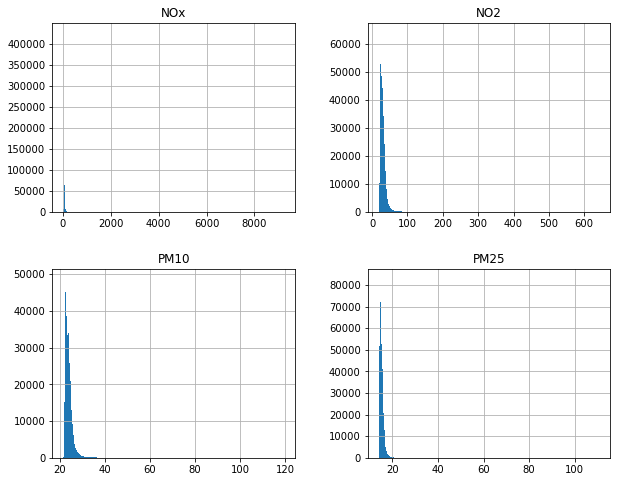

In [7]:
# Plot histograms for each column in the DataFrame
df[['NOx', 'NO2', 'PM10', 'PM25']].hist(bins=5000, figsize=(10,8))

# Show the plot
plt.show()

**Check for outliers**

 Outliers can significantly impact the performance of K-means. Check for outliers in your data and consider removing or transforming them.



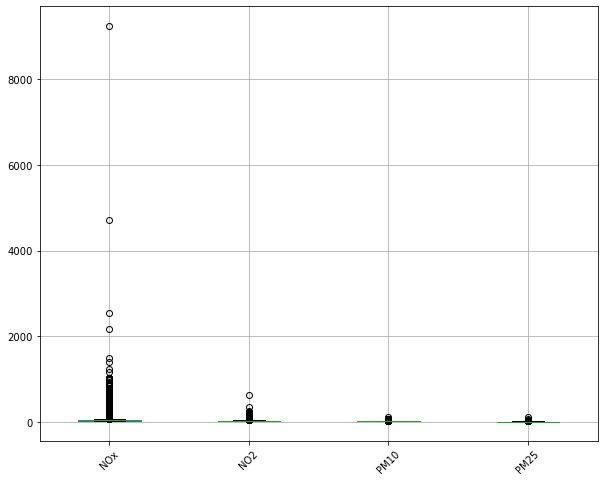

In [8]:
# Plot the boxplot for all columns 'NOx', 'NO2', 'PM10', 'PM25'

plt.figure(figsize=(10,8))
df[['NOx', 'NO2', 'PM10', 'PM25']].boxplot()
plt.xticks(rotation=45)
plt.show()

**Normalize the data**

K-means is a distance-based clustering algorithm and is sensitive to the scale of the data. Normalizing the  data will ensure that features with larger values do not dominate the clustering.

- If a column has a roughly symmetric distribution, then StandardScaler may be a good choice for scaling.
- If a column has a skewed distribution, then MinMaxScaler may be a better choice.
- If a column contains outliers, then you may use RobustScaler, which is less sensitive to outliers.

In [13]:
# Select the columns to scale
cols_to_scale = ['x','y','NOx', 'NO2', 'PM10', 'PM25']

In [14]:
# Create a MinMaxScaler object
scaler = MinMaxScaler()

In [15]:
# Fit and transform the the selected columns (perform normalization)
df_scaled = scaler.fit_transform(df[cols_to_scale])

In [16]:
# Convert the normalized data back to a pandas DataFrame
df_normalized = pd.DataFrame(df_scaled, columns=cols_to_scale)

# Show the normalized data
df_normalized.head()

,x,y,NOx,NO2,PM10,PM25
0,0.0,0.356947,0.002807,0.019587,0.021646,0.008999
1,0.0,0.357339,0.002869,0.019964,0.022080,0.009170
2,0.0,0.357730,0.002932,0.020347,0.022521,0.009343
3,0.0,0.358121,0.002995,0.020728,0.022960,0.009516
4,0.0,0.358513,0.003056,0.021100,0.023390,0.009686


## train the KMeans model

Goal 1:  cluster the grid coordinates based on the concentration of air pollutants, we will use all columns (x, y, NOx, NO2, PM10, PM25) as input to the k-means algorithm. This will create clusters based on the combined information from all columns, taking into account the spatial location (x and y) and the concentration of the air pollutants (NOx, NO2, PM10, PM25).


**Determine the optimal number of clusters**

 K-means requires you to specify the number of clusters upfront. Use techniques like the elbow method or silhouette analysis to determine the optimal number of clusters for your data.

In [28]:
# Define a range of values for k (the number of clusters) that you want to test
k_values = range(1, 11)

In [29]:
# Create a list to store the within-cluster sum of squares (WCSS) for each value of k
wcss = []

In [30]:
# Iterate through the range of k values and fit a k-means clustering model to the data for
# each k value
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_normalized)
    wcss.append(kmeans.inertia_)


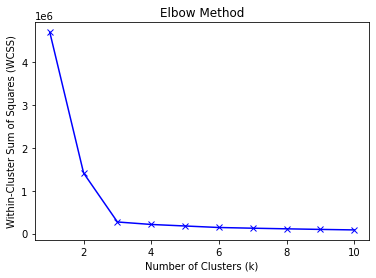

In [31]:
# Plot the WCSS for each value of k
plt.plot(k_values, wcss, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method')
plt.show()

After examining the plot we identify the "elbow" point at k=3, which is the point of diminishing returns in terms of the reduction in WCSS as the number of clusters increases. The optimal number of clusters is typically the value of k at the elbow point.

In [17]:
# create an instance of the KMeans class and set the number of clusters
kmeans = KMeans(n_clusters=3)

In [18]:
# fit the k-means model to your scaled data using the fit() method
kmeans.fit(df_normalized)

KMeans(n_clusters=3)

In [19]:
#Once the k-means model is trained, you can obtain the cluster labels
#  for each data point using the predict() method
cluster_labels = kmeans.predict(df_normalized)

In [24]:
# get the centroids using the cluster_centers_ attribute:
centroids = kmeans.cluster_centers_

In [20]:
#The cluster_centers_ attribute returns an array of shape (n_clusters, n_features)
# that contains the coordinates of the centroids for each cluster.
cluster_labels

array([2, 2, 2, ..., 1, 1, 1])

In [22]:
# add cluster labels to the df_normalised 
df_normalized['cluster'] = cluster_labels

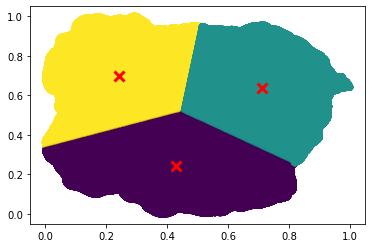

In [25]:
"""plot your data and the cluster centroids to visualize the results of the k-means 
clustering. Use the scatter() function from the matplotlib library to plot the data 
points and the scatter() function again to plot the centroids."""


# Plot the data points
plt.scatter(df_normalized['x'], df_normalized['y'], c=cluster_labels)

# Plot the cluster centroids
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=100, linewidths=3, color='r')

# Show the plot
plt.show()

**Evaluate the results**

 Finally, evaluate the quality of the clustering results using metrics like the within-cluster sum of squares (WCSS) or silhouette score.

In [33]:
# Calculate the WCSS for the clustering results:
wcss = kmeans.inertia_

In [ ]:
# Calculate the silhouette score for the clustering results:
silhouette_avg = silhouette_score(df_normalized, cluster_labels)
print('WCSS:', wcss)
print('Silhouette Score:', silhouette_avg)

"""The WCSS is a measure of how compact the clusters are, and lower values
indicate better clustering results. The silhouette score is a measure of
how well-separated the clusters are, and higher values indicate better
clustering results. However, these metrics should be used in conjunction 
with visual inspection of the clustering results to ensure that the clusters
make sense and are meaningful for the specific problem you are trying to solve."""